In [6]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from scipy.stats import norm
import scipy.stats as st

In [3]:
filmes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cases/n_movies.csv')
filmes.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [4]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [5]:
filmes.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


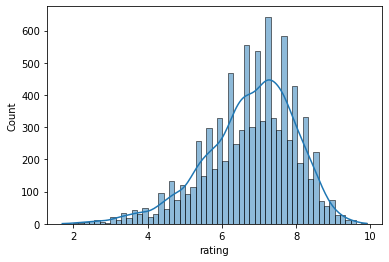

In [9]:
sns.histplot(filmes, x='rating', kde=True)

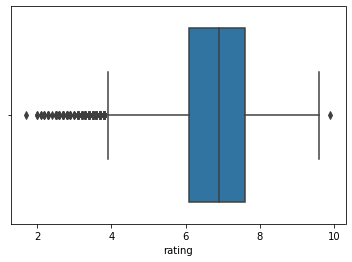

In [11]:
 sns.boxplot(data=filmes, x='rating')

In [12]:
filmes = filmes.dropna()

In [13]:
filmes.shape

(5754, 9)

In [15]:
z = 1.96 # Z score (nivel de confiança)
p = 0.5 # desvio padrão
e = 0.05 # margem de erro
n = 5754

tamanho_amostra = ((z**2)*p*(1-p)/(e**2))/1+(((z**2)*p*(1-p))/((e**2)*n))

tamanho_amostra

384.22676399026756

# Amostragem Sistemática

In [16]:
amostra_simples = filmes.sample(385, replace=True)

amostra_simples

,title,year,certificate,duration,genre,rating,description,stars,votes
8914,Bridgerton,(2020– ),TV-MA,57 min,"Drama, History, Romance",7.5,"On her honeymoon, Daphne discovers just how un...","['Julie Anne Robinson', '| ', ' Stars:', 'J...","2,363"
1873,Concrete Cowboy,(2020),R,111 min,"Drama, Western",6.3,Sent to live with his estranged father for the...,"['Ricky Staub', '| ', ' Stars:', 'Idris Elb...","8,843"
90,Mr. Robot,(2015–2019),TV-MA,49 min,"Crime, Drama, Thriller",8.6,"Elliot, a brilliant but highly unstable young ...","['Rami Malek, ', 'Christian Slater, ', 'Carly ...","383,470"
2078,My Best Friend Anne Frank,(2021),TV-14,103 min,Drama,6.2,This story is based on the memoirs of Frank's ...,"['Ben Sombogaart', '| ', ' Stars:', 'Aiko B...","4,276"
1882,Tall Girl 2,(2022),TV-PG,97 min,"Comedy, Drama, Family",4.7,"After Jodi Kreyman gains popularity, her misco...","['Emily Ting', '| ', ' Stars:', 'Ava Michel...","4,644"
...,...,...,...,...,...,...,...,...,...
8135,The Boondocks,(2005–2014),TV-MA,23 min,"Animation, Action, Comedy",8.3,An eccentric art teacher encourages Riley to e...,"['Kalvin Lee', '| ', ' Stars:', 'Regina Kin...",400
165,Agents of S.H.I.E.L.D.,(2013–2020),TV-PG,45 min,"Action, Adventure, Drama",7.5,The missions of the Strategic Homeland Interve...,"['Clark Gregg, ', 'Ming-Na Wen, ', 'Brett Dalt...","216,461"
9368,The Big Show Show,(2020),TV-G,26 min,Comedy,7.1,While Cassy struggles to adjust to life with n...,"['Bob Koherr', '| ', ' Stars:', 'Paul Wight...",115
8412,On My Block,(2018–2021),TV-14,32 min,"Comedy, Drama",8.0,"With Cesar's options dwindling, he takes drast...","['Lauren Iungerich', '| ', ' Stars:', 'Sier...",216


# Amostra Sistemática
## Step = 5

In [17]:
def amostragem_sistematica(df, step):
  indexes = np.arange(5, len(df), step=step)
  amostragem_sistematica = df.iloc[indexes]
  return amostragem_sistematica

amostra_sistematica = amostragem_sistematica(filmes, 5)

# Function view


amostra_sistematica.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
5,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"
10,Stranger Things,(2016– ),TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...","1,149,889"
15,I Came By,(2022),TV-MA,110 min,Thriller,6.1,Follows a young graffiti artist who discovers ...,"['Babak Anvari', '| ', ' Stars:', 'Antonio ...","16,230"
22,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,597"
27,Shameless,(2011–2021),TV-MA,46 min,"Comedy, Drama",8.6,"A scrappy, feisty, fiercely loyal Chicago fami...","['Emmy Rossum, ', 'William H. Macy, ', 'Ethan ...","239,541"


# Teorema do Limite Central

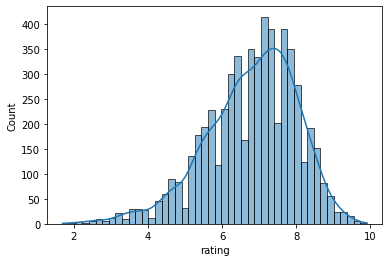

In [18]:
# Verificando a distribuição por histograma da minha variável "Rating"

sns.histplot(data=filmes, x='rating', kde=True)

In [20]:
rating = filmes.rating.values.tolist()
rating

[8.5,
 8.7,
 8.9,
 5.9,
 8.6,
 7.8,
 9.2,
 9.5,
 6.3,
 6.2,
 8.7,
 4.7,
 8.1,
 8.1,
 6.4,
 6.1,
 5.8,
 8.8,
 8.8,
 7.6,
 8.4,
 8.0,
 7.4,
 7.8,
 8.9,
 8.6,
 8.5,
 8.5,
 5.9,
 6.5,
 5.0,
 8.5,
 8.5,
 8.2,
 8.0,
 8.9,
 8.1,
 7.9,
 8.5,
 6.8,
 5.3,
 8.8,
 8.4,
 8.0,
 8.2,
 8.4,
 8.0,
 7.9,
 9.0,
 7.1,
 7.3,
 6.1,
 8.7,
 8.4,
 9.0,
 7.7,
 7.4,
 8.2,
 8.9,
 8.2,
 6.3,
 8.3,
 7.6,
 8.5,
 8.6,
 7.7,
 8.2,
 6.5,
 8.5,
 7.4,
 8.0,
 9.0,
 8.8,
 8.3,
 7.6,
 7.8,
 7.5,
 6.6,
 8.6,
 8.7,
 7.6,
 8.6,
 8.5,
 8.6,
 8.1,
 7.7,
 6.3,
 3.3,
 6.6,
 7.9,
 7.3,
 9.1,
 8.7,
 7.7,
 8.5,
 6.7,
 7.8,
 8.1,
 8.7,
 8.9,
 7.5,
 8.7,
 8.8,
 8.4,
 8.2,
 8.1,
 8.2,
 8.3,
 8.4,
 7.7,
 7.6,
 7.6,
 8.1,
 5.8,
 8.7,
 8.5,
 6.9,
 7.5,
 8.7,
 8.6,
 7.4,
 8.6,
 7.1,
 7.6,
 5.4,
 7.7,
 7.7,
 7.7,
 8.7,
 8.4,
 7.6,
 6.8,
 7.3,
 8.8,
 7.9,
 8.3,
 8.6,
 8.4,
 7.4,
 8.4,
 2.7,
 7.2,
 8.2,
 8.4,
 7.6,
 5.4,
 8.5,
 8.5,
 7.7,
 6.2,
 8.2,
 7.7,
 7.2,
 8.0,
 8.5,
 7.5,
 7.8,
 8.2,
 7.5,
 6.6,
 7.3,
 2.6,
 7.9,
 8.7,
 6.3,
 8.5,
 8.4

In [21]:
#Extraio a quantidade de amostras aleatorias com base na quantidade de amostras tiradas pelo cálculo

pop = rating
means = []

for i in range(385):
  sample = random.sample(pop, k=385)
  means.append(np.mean(sample))

means

[6.809870129870131,
 6.787792207792208,
 6.76935064935065,
 6.804935064935065,
 6.825454545454546,
 6.817922077922077,
 6.88987012987013,
 6.796883116883118,
 6.868311688311688,
 6.738701298701299,
 6.753766233766234,
 6.8761038961038965,
 6.886753246753246,
 6.705974025974027,
 6.865194805194806,
 6.774285714285714,
 6.901558441558441,
 6.727792207792208,
 6.747272727272727,
 6.750389610389609,
 6.842337662337663,
 6.708571428571429,
 6.824675324675325,
 6.69948051948052,
 6.773766233766233,
 6.790649350649351,
 6.850389610389611,
 6.898961038961039,
 6.827012987012988,
 6.804155844155845,
 6.81064935064935,
 6.747792207792208,
 6.955844155844156,
 6.777922077922078,
 6.823896103896104,
 6.8397402597402595,
 6.8,
 6.749090909090908,
 6.899220779220779,
 6.890649350649351,
 6.82987012987013,
 6.768051948051948,
 6.696883116883117,
 6.887532467532467,
 6.807532467532468,
 6.84857142857143,
 6.7290909090909095,
 6.819999999999999,
 6.744935064935065,
 6.814285714285713,
 6.73948051948051

In [22]:
# Média das amostras
means

[6.809870129870131,
 6.787792207792208,
 6.76935064935065,
 6.804935064935065,
 6.825454545454546,
 6.817922077922077,
 6.88987012987013,
 6.796883116883118,
 6.868311688311688,
 6.738701298701299,
 6.753766233766234,
 6.8761038961038965,
 6.886753246753246,
 6.705974025974027,
 6.865194805194806,
 6.774285714285714,
 6.901558441558441,
 6.727792207792208,
 6.747272727272727,
 6.750389610389609,
 6.842337662337663,
 6.708571428571429,
 6.824675324675325,
 6.69948051948052,
 6.773766233766233,
 6.790649350649351,
 6.850389610389611,
 6.898961038961039,
 6.827012987012988,
 6.804155844155845,
 6.81064935064935,
 6.747792207792208,
 6.955844155844156,
 6.777922077922078,
 6.823896103896104,
 6.8397402597402595,
 6.8,
 6.749090909090908,
 6.899220779220779,
 6.890649350649351,
 6.82987012987013,
 6.768051948051948,
 6.696883116883117,
 6.887532467532467,
 6.807532467532468,
 6.84857142857143,
 6.7290909090909095,
 6.819999999999999,
 6.744935064935065,
 6.814285714285713,
 6.73948051948051

In [23]:
 #Médias das amostras

 np.mean(means)

6.792726598077246

In [24]:
#Média populacional
np.mean(pop)

6.792822384428223

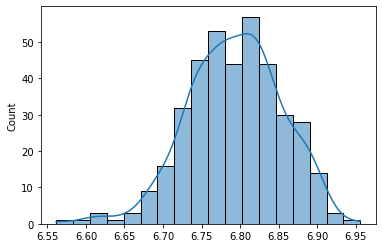

In [25]:
#Histograma de médias amostrais

sns.histplot(means, kde=True)

# Intervalo de confiança

Criando um intervalo de confiança com nível de confiança 95% para o rating populacional médio usando distribuição t

In [26]:
test_95 = st.norm.interval(alpha=0.95, loc=np.mean(means), scale=st.sem(means))
test_95

(6.786690538509027, 6.798762657645466)